In [1]:
import f3dasm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('science')

In [3]:
# opts = {'list1': 0,
# 'list2': [3,2]}


# # Make everything a list

# r = {key:[value] for key,value in opts.items()}

# from itertools import product

# a = list(product(*opts.values()))

# [{key: value for key, value in zip(opts, o)} for o in a]

# r

In [4]:
dim = 10
bounds = np.tile([-1.0,1.0], (dim, 1))
design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dim)
data = f3dasm.Data(design=design)

In [5]:
args = {
'realizations': 10,
'iterations': 1000,
'function': f3dasm.functions.Levy(dimensionality=dim, noise=False, scale_bounds=bounds),
'sampler': f3dasm.sampling.LatinHypercubeSampling(design=design),
'verbal': True
}



In [15]:
args['function'].offset

array([[-0.77646293,  0.77389977, -0.1291466 , -0.42705775,  0.2055035 ,
         0.08491963,  0.52698604, -0.1199584 , -0.65942113,  0.19696601]])

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{0}$', ylabel='$X_{1}$'>)

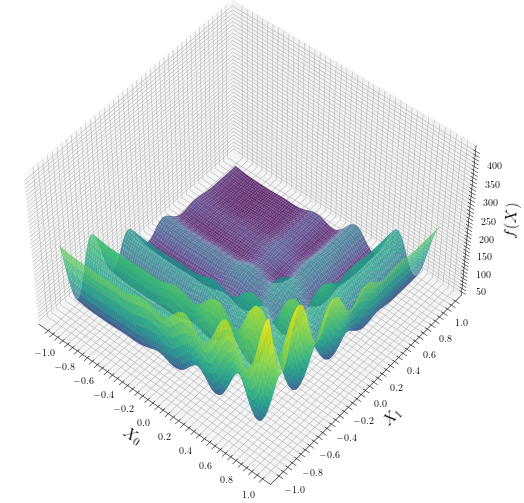

In [6]:
args['function'].plot(domain=bounds,px=100)

In [7]:
hyperparameters=[{'learning_rate': x} for x in np.logspace(-8,2,11)]
hyperparameters


[{'learning_rate': 1e-08},
 {'learning_rate': 1e-07},
 {'learning_rate': 1e-06},
 {'learning_rate': 1e-05},
 {'learning_rate': 0.0001},
 {'learning_rate': 0.001},
 {'learning_rate': 0.01},
 {'learning_rate': 0.1},
 {'learning_rate': 1.0},
 {'learning_rate': 10.0},
 {'learning_rate': 100.0}]

In [8]:
results = []

for h in hyperparameters:
    args_temp = args.copy()
    args_temp['optimizer'] = f3dasm.optimization.Adam(data=data, hyperparameters=h)
    results.append(f3dasm.run_multiple_realizations(**args_temp))

Optimization took 171.08s total
Optimization took 174.57s total
Optimization took 152.29s total
Optimization took 147.60s total
Optimization took 146.75s total
Optimization took 145.54s total
Optimization took 147.35s total
Optimization took 147.28s total
Optimization took 148.49s total
Optimization took 144.92s total
Optimization took 149.21s total


In [9]:
# results = []

# for opt in f3dasm.optimization.OPTIMIZERS:
#     args_temp = args.copy()
#     args_temp['optimizer'] = opt(data=data)
#     results.append(f3dasm.run_multiple_realizations(**args_temp))

In [10]:
def calc_mean_std(results):
    mean_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).mean(axis=1)
    std_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).std(axis=1)
    return mean_y, std_y

In [11]:
def plot_results(results, ax, label):
    mean_y, std_y = calc_mean_std(results)

    ax.plot(mean_y, label=label)

    ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, alpha=.1)

    return ax

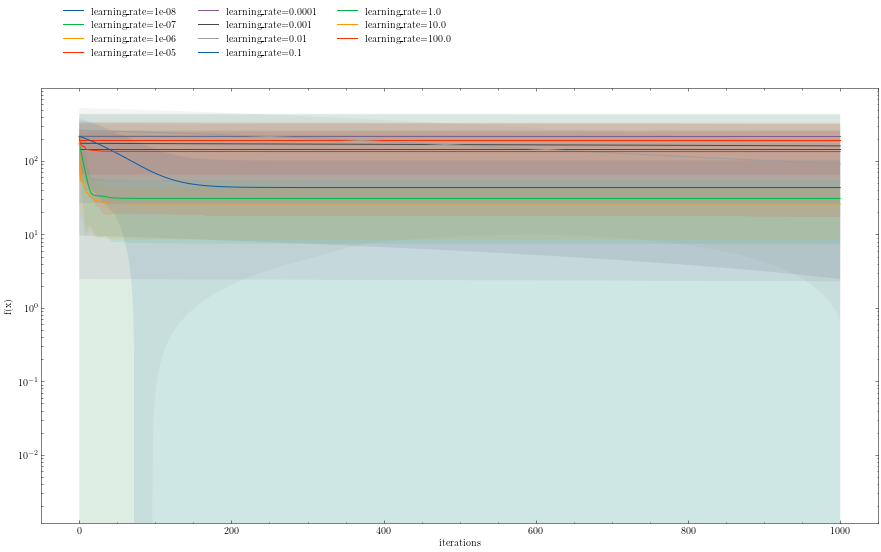

In [14]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')


for index, res in enumerate(results):
    ax = plot_results(res, ax, f"learning_rate={hyperparameters[index]['learning_rate']}")

ax.legend(loc='lower right', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)